In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

In [3]:
batch_size_train = 4
batch_size_test = 4

#train_loader, test_loader = define_mnist_loaders(batch_size_train, batch_size_test)
train_loader, test_loader = define_landscapes_loaders(batch_size_train, batch_size_test, 
                                                      rgb=True, rescale=256, crop=224)

encoding_dim = 2048
lr = 0.001
log_interval = 10
n_epochs = 3

Loaded image shape in tensor: torch.Size([4, 3, 224, 224])


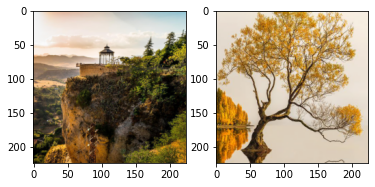

In [4]:
# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))
if isinstance(x, list): # if MNIST
    x = x[0]; x_test = x_test[0]
print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = x_test[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [5]:
#autoencoder = MNIST_Autoencoder(28*28, encoding_dim)
autoencoder = C_Autoencoder_224(224*224, encoding_dim)
opt = torch.optim.Adam(autoencoder.parameters(), lr=lr, weight_decay=1e-5)

Shape : torch.Size([4, 3, 224, 224])


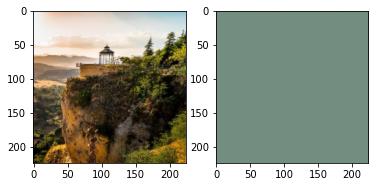

In [6]:
fig,axes = plt.subplots(1,2)
axes[0].imshow(x[0].cpu().numpy().transpose((1, 2, 0))); 
reconstructed = autoencoder(x)
print(f"Shape : {reconstructed.shape}")
axes[1].imshow(reconstructed[0].detach().cpu().numpy().transpose((1, 2, 0)))

Epoch 1/4
----------


100%|█████████████████████████████████████████| 864/864 [00:55<00:00, 15.65it/s]


train loss 0.671989


  0%|                                                   | 0/216 [00:00<?, ?it/s]

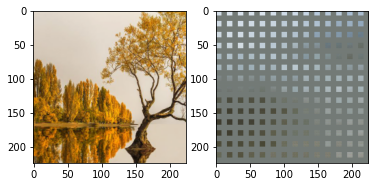

100%|█████████████████████████████████████████| 216/216 [00:54<00:00,  4.00it/s]


valid loss 0.667845

Epoch 2/4
----------


100%|█████████████████████████████████████████| 864/864 [00:55<00:00, 15.70it/s]


train loss 0.665438


  0%|                                                   | 0/216 [00:00<?, ?it/s]

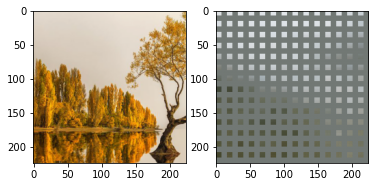

100%|█████████████████████████████████████████| 216/216 [00:54<00:00,  4.00it/s]


valid loss 0.666025

Epoch 3/4
----------


100%|█████████████████████████████████████████| 864/864 [00:56<00:00, 15.41it/s]


train loss 0.663176


  0%|                                                   | 0/216 [00:00<?, ?it/s]

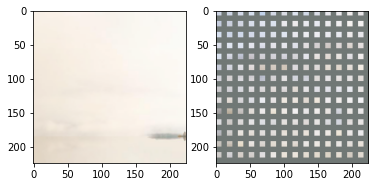

100%|█████████████████████████████████████████| 216/216 [00:53<00:00,  4.02it/s]


valid loss 0.663289

Epoch 4/4
----------


100%|█████████████████████████████████████████| 864/864 [00:54<00:00, 15.72it/s]


train loss 0.660632


  0%|                                                   | 0/216 [00:00<?, ?it/s]

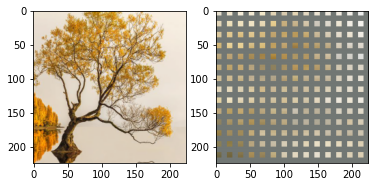

100%|█████████████████████████████████████████| 216/216 [00:53<00:00,  4.01it/s]

valid loss 0.662455

CPU times: user 1h 53min 44s, sys: 2min 12s, total: 1h 55min 57s
Wall time: 7min 19s


([0.6719892868429811,
  0.6654378706570472,
  0.6631757003526094,
  0.6606324462745711],
 [0.667845363970156,
  0.6660251454622658,
  0.6632890811672917,
  0.6624551489949226])

In [7]:
%time train(autoencoder, opt, trainloader=train_loader, valloader=test_loader, num_epochs=4)

In [8]:
x = next(iter(train_loader))
if isinstance(x, list):
    x = x[0]

Image 0


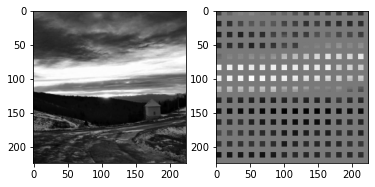

In [9]:
#z = autoencoder(x)
i = np.random.randint(batch_size_test)
print(f"Image {i}")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[i][0].cpu()); axes[1].imshow(autoencoder(x)[i][0].detach().cpu())

In [10]:
err

NameError: name 'err' is not defined

In [ ]:
import pandas as pd
fichier = "model_c-autoenc224_adam_n150"
model = C_Autoencoder_224(224*224, 2048).to(device)
model.load_state_dict(torch.load(f"saved_models/{fichier}.sav"))
losses = pd.read_csv(f"saved_models/{fichier}.csv")
plt.plot(losses.index, losses["train"], label = "train")
plt.plot(losses.index, losses["val"], label = "test")
plt.legend()
plt.grid()

In [ ]:
x = next(iter(test_loader))
if isinstance(x, list):
    x = x[0]
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][0])
axes[0].imshow(x[0][0].cpu()); axes[1].imshow(model(x)[0][0].detach().cpu())